In [168]:
import sys
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

IN_COLAB = 'google.colab' in sys.modules
warnings.filterwarnings("ignore", category=UserWarning)


In [129]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4

In [171]:
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    DATA_PATH = '/content/drive/My Drive/data'
else:
  df = pd.read_csv('Churn_Modelling.csv')

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- terdiri dari 10000 baris<br>
- semua kolom terisi penuh (tidak ada data null)<br>
- type sudah sesuai

In [133]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6044,6045,15734588,Manning,684,France,Male,46,0,0.00,2,1,1,36376.97,0
8624,8625,15773639,Truscott,745,Germany,Male,35,4,98270.34,1,1,0,133617.43,0
2459,2460,15756920,Genovesi,576,France,Male,63,9,70655.48,1,0,0,78955.80,1
5695,5696,15773591,Jobson,787,France,Male,46,7,117685.31,2,1,1,93360.35,0
1247,1248,15711288,Hay,512,France,Male,24,6,0.00,2,1,0,37654.31,0


<h2><center>Statistical Summary</h2></center>

In [134]:
numerical = [
  # 'RowNumber',
  # 'CustomerId',
  'CreditScore',
  'Age',
  'Balance',
  'EstimatedSalary'
]
categorical = [
  'Surname',
  'Geography',
  'Gender',
  'Tenure',
  'NumOfProducts',
  'HasCrCard',
  'IsActiveMember',
]

In [135]:
df[numerical].describe()

,CreditScore,Age,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,76485.889288,100090.239881
std,96.653299,10.487806,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,11.580000
25%,584.000000,32.000000,0.000000,51002.110000
50%,652.000000,37.000000,97198.540000,100193.915000
75%,718.000000,44.000000,127644.240000,149388.247500
max,850.000000,92.000000,250898.090000,199992.480000


Pengataman dari Fitur Numerical:
- Kolom `CreditScore`, `Age`, `EstimatedSalary` sudah cukup simetrik distribusinya (mean dan median tidak terlalu jauh)
- Kolom `Balance` skewed

In [136]:
df[categorical].describe(include=[object])

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [137]:
df[categorical].describe(exclude=[object])

,Tenure,NumOfProducts,HasCrCard,IsActiveMember
count,10000.000000,10000.000000,10000.00000,10000.000000
mean,5.012800,1.530200,0.70550,0.515100
std,2.892174,0.581654,0.45584,0.499797
min,0.000000,1.000000,0.00000,0.000000
25%,3.000000,1.000000,0.00000,0.000000
50%,5.000000,1.000000,1.00000,1.000000
75%,7.000000,2.000000,1.00000,1.000000
max,10.000000,4.000000,1.00000,1.000000


Pengamatan:
- Fitur `Surname` memiliki jumlah unique values yang tinggi (dropped)

In [138]:
for col in categorical:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Surname:
Smith        32
Martin       29
Scott        29
Walker       28
Brown        26
             ..
Wardle        1
Lawley        1
Potts         1
Aikenhead     1
Dipietro      1
Name: Surname, Length: 2932, dtype: int64

Value count kolom Geography:
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Value count kolom Gender:
Male      5457
Female    4543
Name: Gender, dtype: int64

Value count kolom Tenure:
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

Value count kolom NumOfProducts:
1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

Value count kolom HasCrCard:
1    7055
0    2945
Name: HasCrCard, dtype: int64

Value count kolom IsActiveMember:
1    5151
0    4849
Name: IsActiveMember, dtype: int64



<h2><center>Univariate Analysis</h2></center>

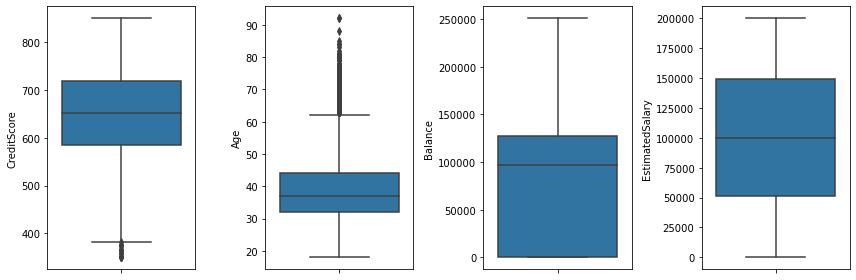

In [139]:
for i in range(0, len(numerical)):
    plt.subplot(1, len(numerical), i+1)
    sns.boxplot(y=df[numerical[i]])
    plt.tight_layout()

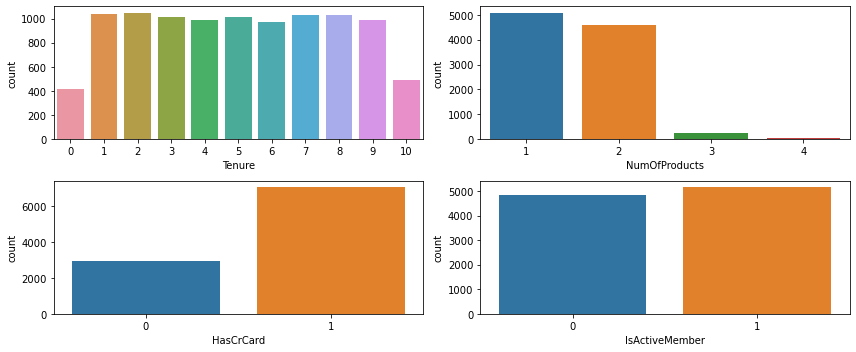

In [149]:
categorical_int = df[categorical].select_dtypes(include=np.number).columns
plt.figure(figsize=(12, 5))
for i in range(0, len(categorical_int)):
    plt.subplot(2, len(categorical_int)/2, i+1)
    sns.countplot(x=df[categorical_int[i]])
    plt.xlabel(categorical_int[i])
    plt.tight_layout()

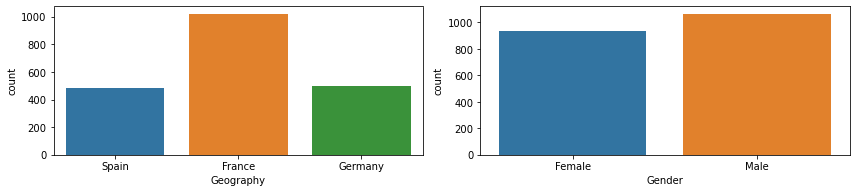

In [148]:
try:
  categorical.remove('Surname')
except:
  pass
categorical_obj = df[categorical].select_dtypes(include=object).columns
df_sample = df.sample(2000, random_state=123)
plt.figure(figsize=(12, 5))
for i in range(0, len(categorical_obj)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df_sample[categorical_obj[i]])
    plt.tight_layout()

- Kolom `CreditScore`, `EstimatedSalary` sudah mendekati distribusi normal
- Kolom `Age` Skewed
- Kolom `Balance` ada 2 puncak ?

<h2><center>Bivariate Analysis</h2></center>

In [157]:
df_copy = df.copy()
df_copy.drop(['Surname','CustomerId','RowNumber'], axis=1, inplace=True)
corr_df = df_copy.corr()

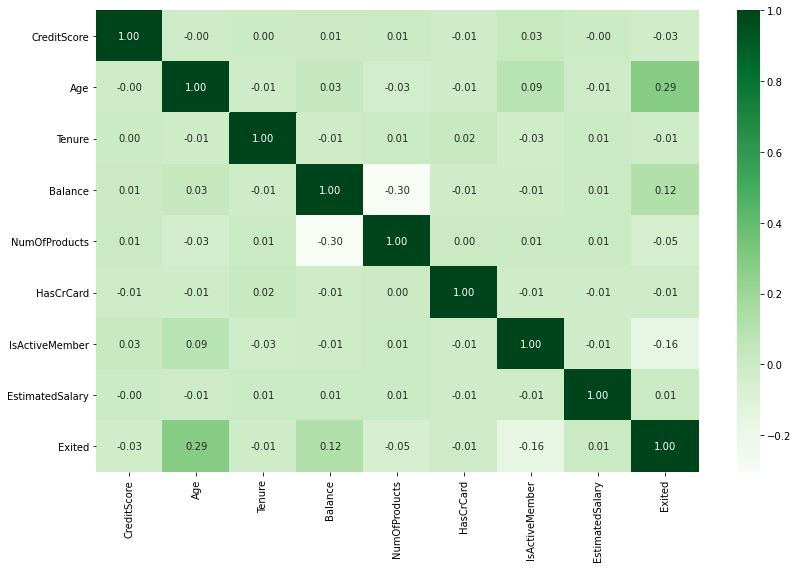

In [159]:
# correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_df, annot=True, fmt='.2f', cmap='Greens')
plt.tight_layout()

Kesimpulan *correlation heatmap*:
* Target kita `exited` memiliki korelasi lemah dengan `Balance`, `isActiveMember`, dan `NumOfProducts` dan memiliki korelasi positif cukup kuat dengan `Age`
* Perlu di-highlight bahwa `CreditScore` kemungkinan memiliki korelasi kecil dengan target kita `exited`